In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

#for interactability
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display



In [2]:
df = pd.read_csv(r'C:\Users\Dennis\Documents\globalterrorism.csv', encoding='ISO-8859-1', sep=',')
df.head()

C:\Users\Dennis\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
 df.shape

(181691, 135)

In [4]:
# Creating a sub copy of data 
df_raw = df.copy()

df=df[['iyear','imonth','iday','extended','country_txt',
         'region_txt','city','success','suicide',
         'targtype1_txt','gname','weaptype1_txt']]
df.describe()

,iyear,imonth,iday,extended,success,suicide
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,0.045346,0.889598,0.036507
std,13.259430,3.388303,8.814045,0.208063,0.313391,0.187549
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,1.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,1.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,1.000000,0.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000


### Checking for missing Values

In [5]:
#Checking for missing values from the data

nan_cols = df.isna().mean() * 100
nan_cols

#Droping missing City columns
df.dropna(axis = 0, how= 'any', inplace = True)
#nan_cols

In [6]:
#Renaming columns 
df.rename(columns = {'iyear': 'year', 'imonth': 'month', 'iday':'day', 'country_txt': 'country', 'region_txt':'region',
                    'targtype1_txt': 'target','gname': 'group','weaptype1_txt': 'weapon' }, inplace =True)

df.head()

,year,month,day,extended,country,region,city,success,suicide,target,group,weapon
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Private Citizens & Property,MANO-D,Unknown
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Government (Diplomatic),23rd of September Communist League,Unknown
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Journalists & Media,Unknown,Unknown
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Government (Diplomatic),Unknown,Explosives
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Government (Diplomatic),Unknown,Incendiary


In [7]:
df.describe(include = 'all')

,year,month,day,extended,country,region,city,success,suicide,target,group,weapon
count,181257.000000,181257.000000,181257.000000,181257.000000,181257,181257,181257,181257.000000,181257.000000,181257,181257,181257
unique,NaN,NaN,NaN,NaN,205,12,36674,NaN,NaN,22,3535,12
top,NaN,NaN,NaN,NaN,Iraq,Middle East & North Africa,Unknown,NaN,NaN,Private Citizens & Property,Unknown,Explosives
freq,NaN,NaN,NaN,NaN,24620,50444,9775,NaN,NaN,43315,82444,92292
mean,2002.624599,6.466779,15.504665,0.045328,NaN,NaN,NaN,0.889488,0.036550,NaN,NaN,NaN
std,13.271843,3.388787,8.814744,0.208023,NaN,NaN,NaN,0.313527,0.187655,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,1991.000000,4.000000,8.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN
50%,2009.000000,6.000000,15.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN
75%,2014.000000,9.000000,23.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN


In [8]:
# w = widgets.IntSlider()

# display(w)

### Identifying year with most terrorist attack

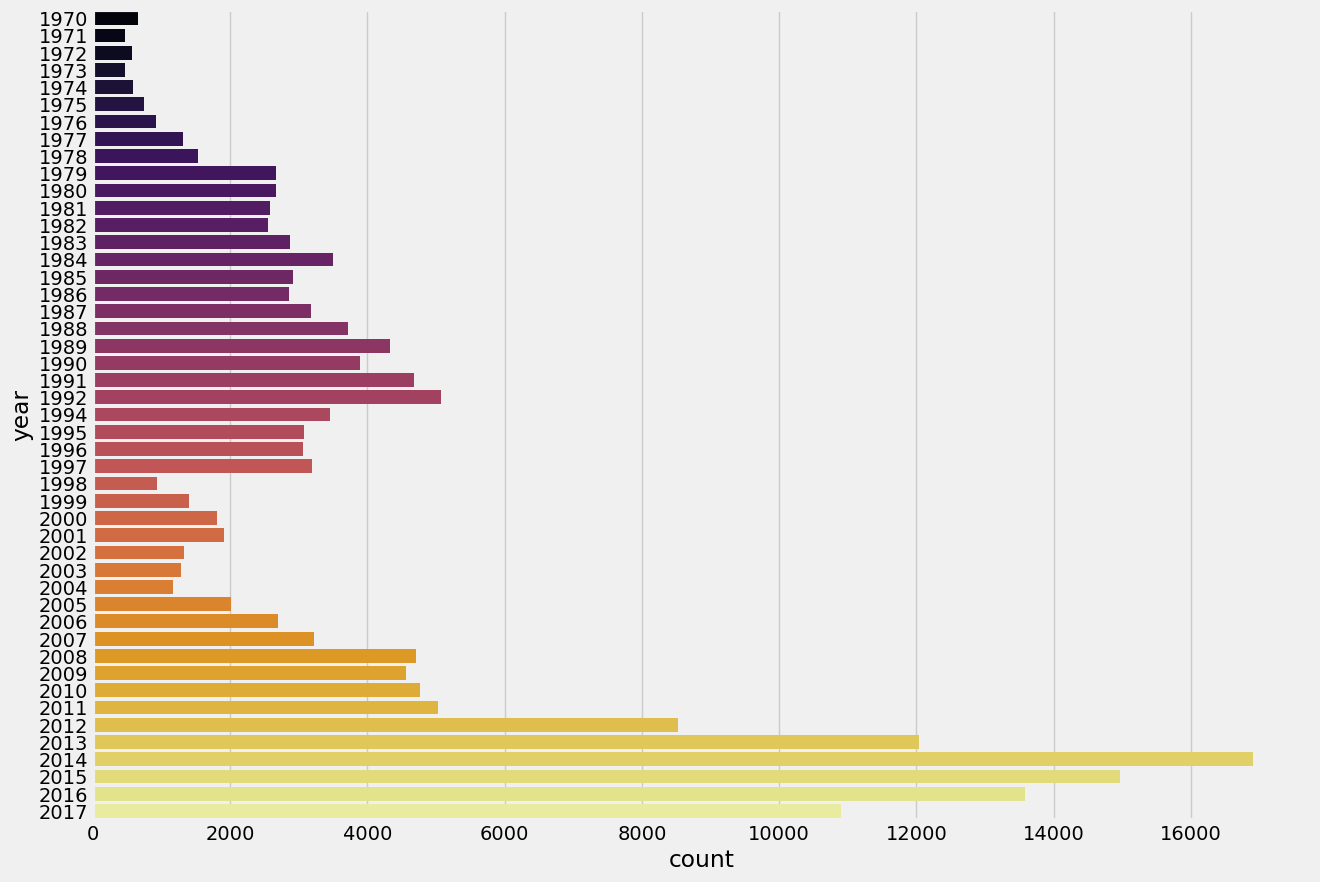

In [9]:
##Identifying year with most terrorist atttack

plt.rcParams['figure.figsize']= 14, 10
sns.countplot(y= df.year, palette = 'inferno')
plt.show()

### Checking regions affected by attacks for each year

In [10]:
#Checking Regions affected by Terrorists for each year

def attack_year(year = list(df['year'].unique())):
    a = df[df.year == year ]
    return sns.countplot(y= a['region'], palette = 'viridis')

In [11]:
print(widgets.interact(attack_year))

interactive(children=(Dropdown(description='year', options=(1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 19…

<function attack_year at 0x000002F222989820>


### Checking countries affected more for each region

In [12]:
#Checking countries affected more for each region

def each_region(region = list(df['region'].unique())):
    a = df[df.region == region ]
    a = pd.DataFrame(a['country'].value_counts())
    
    
    return a.style.background_gradient(cmap = 'plasma')

In [13]:
print(widgets.interact(each_region))

interactive(children=(Dropdown(description='region', options=('Central America & Caribbean', 'North America', …

<function each_region at 0x000002F279FF68B0>


### Checking cities that are affected more for each country

In [14]:
#Checking cities that are affected more for each country

def each_country(country = list(df['country'].unique())):
    a = df[df['country'] == country]
    
    a= pd.DataFrame(a['city'].value_counts())
    
    return a.style.background_gradient(cmap = 'plasma')



print(widgets.interact(each_country))
    
     
    
    

interactive(children=(Dropdown(description='country', options=('Dominican Republic', 'Mexico', 'Philippines', …

<function each_country at 0x000002F201F80F70>


### Checking weapons that are used for each country

In [15]:
#Checking weapons that were used most  for each country

def each_country(country = list(df['country'].unique())):
    a = df[df['country'] == country]
    
    a= pd.DataFrame(a['weapon'].value_counts())
    
    return a.style.background_gradient(cmap = 'plasma')


In [16]:
print(widgets.interact(each_country))

interactive(children=(Dropdown(description='country', options=('Dominican Republic', 'Mexico', 'Philippines', …

<function each_country at 0x000002F202426940>


### Identifying favorite targets of terrorists

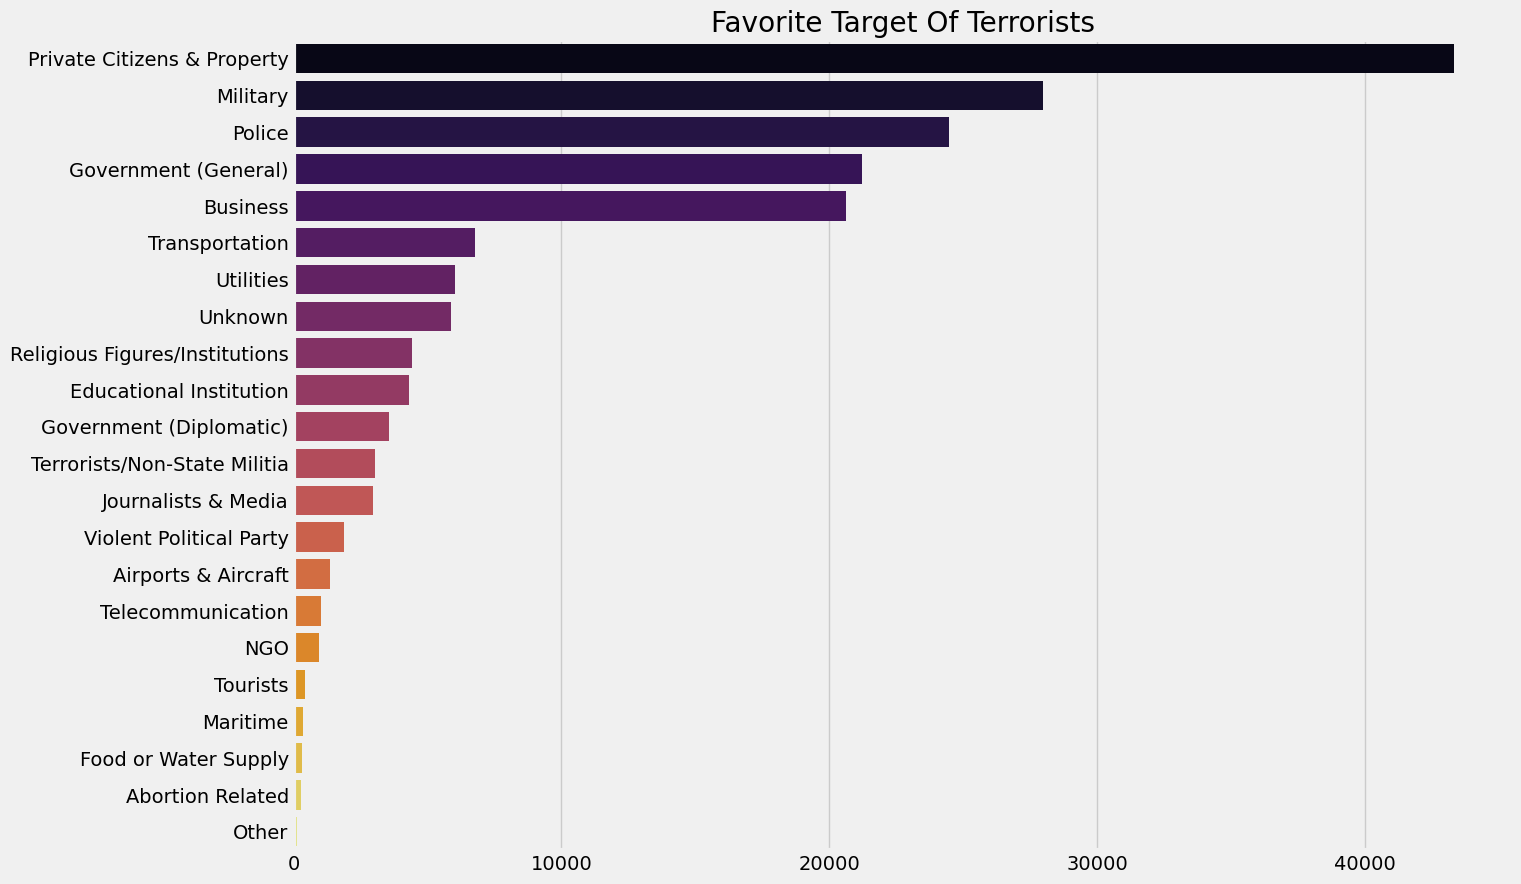

In [17]:
#Checking favorite target of terrorists
plt.rcParams['figure.figsize']= 14, 10
sns.barplot(x = df.target.value_counts().values, y = df.target.value_counts().index, palette = 'inferno')
plt.title("Favorite Target Of Terrorists")
plt.show()

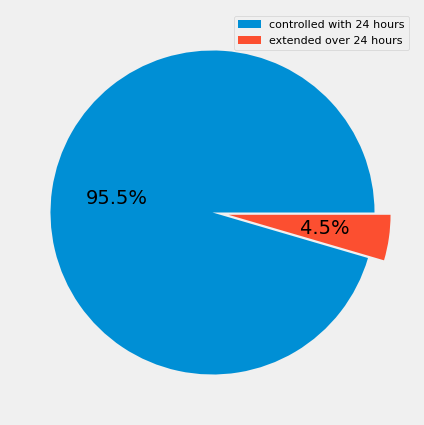

In [19]:
plt.rcParams['figure.figsize']= 5, 5
label = ['controlled with 24 hours','extended over 24 hours']
plt.pie(df.extended.value_counts(),explode = (0, 0.1), autopct='%1.1f%%')
plt.legend(label, fontsize = 8)
plt.show()

In [23]:
# # Missing Value Treatments

# missing_cols_distn = [ col for col in data.columns if data[col].isnull().sum() > 1]
# missing_cols_distn
    
#checking total perecentage missing
# missing_cols = data.isnull().sum()
# total_missing_cols = missing_cols.sum()

# total_cell = np.product(data.shape)

# percentage_missing =  (total_missing_cols / total_cell) * 100
# percentage_missing

# #Dropping missing values columns
# missing_cols_todrop = [col for col in data.columns if data[col].isnull().any()]
# # missing_cols_todrop

# reduced_data = data.drop(missing_cols_todrop, axis = 1)
# # print(reduced_data.head())

# data = reduced_data
# # data.head()


# #For categorical variables


# low_cardinality_cols = [cname for cname in data if data[cname].nunique() < 10 and data[cname].dtype == 'object']
# low_cardinality_cols

# #numerical columns
# numerical_cols = [ cname  for cname in data if data[cname].dtype in ['int64','float64']]
# numerical_cols

# #keep my columns
# mycols = low_cardinality_cols + numerical_cols
# mycols
# data = data[mycols].copy()

# # # Get list of categorical variables
# # s = (data.dtypes == 'object')
# # object_cols = list(s[s].index)

# # # print("Categorical variables:")
# # print(object_cols)
# print(mycols)








